In [ ]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *

In [ ]:
from fastai.callback.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from fastai.vision import *
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd
from pathlib import Path

In [ ]:
d_path=Path('/content/drive/My Drive/DL_project_music/Data/MELspectrograms')

In [ ]:
"""Functions for doing mixed-example data augmentation."""

import numpy as np
import tensorflow as tf

def mixup(images, labels):
  mix_coeff = tf.random_uniform([])
  image = mix_coeff * images[0] + (1 - mix_coeff) * images[1]
  label = mix_coeff * labels[0] + (1 - mix_coeff) * labels[1]
  return (image, label)


def vert_concat(images, labels):
  (_, H, W, C) = images.get_shape().as_list()
  dim_H = tf.random_uniform([], 0, H, dtype=tf.int32)
  lambda_H = tf.cast(dim_H, tf.float32) / tf.constant(H, dtype=tf.float32)
  image = tf.concat([images[0][:dim_H, :, :],
                     images[1][dim_H:, :, :]], 0)
  label = lambda_H * labels[0] + (1 - lambda_H) * labels[1]
  return (image, label)


def horiz_concat(images, labels):
  (_, H, W, C) = images.get_shape().as_list()
  dim_W = tf.random_uniform([], 0, W, dtype=tf.int32)
  lambda_W = tf.cast(dim_W, tf.float32) / tf.constant(W, dtype=tf.float32)
  image = tf.concat([images[0][:, :dim_W, :],
                     images[1][:, dim_W:, :]], 1)
  label = lambda_W * labels[0] + (1 - lambda_W) * labels[1]
  return (image, label)

def vh_mixup(images, labels):
    image1, label1 = vert_concat(images, labels)
    image2, label2 = horiz_concat(images, labels)

    # Create augmented samples
    aug_images = mixup(tf.stack([image1, image2]), tf.stack([label1, label2]))[0]
    aug_labels = mixup(tf.stack([image1, image2]), tf.stack([label1, label2]))[1]

    # Concatenate augmented samples with original samples
    images = tf.concat([images[0], aug_images], axis=0)
    labels = tf.concat([labels[0], aug_labels], axis=0)

    return (images, labels)


In [ ]:
from fastai.vision import *
from fastai.vision.data import ImageDataLoaders,imagenet_stats
from fastai.vision.augment import aug_transforms

batch_tfms = [IntToFloatTensor(), Normalize.from_stats(*imagenet_stats), *aug_transforms(), vh_mixup]
data = ImageDataLoaders.from_folder(d_path, train='.', valid_pct=0.2, ds_tfms=batch_tfms, size=224, num_workers=4, batch_size=4)
# data = ImageDataLoaders.from_folder(d_path, train='.', valid_pct=0.2, size=224, num_workers=4, batch_size=4)


In [ ]:
data

In [ ]:
print(data.__dict__)


{'loaders': [<fastai.data.core.TfmdDL object at 0x7f8bec779850>, <fastai.data.core.TfmdDL object at 0x7f8ab9cf3490>], 'path': Path('/content/drive/My Drive/DL_project_music/Data/MELspectrograms'), '_device': device(type='cuda', index=0)}


In [ ]:
data.train

In [ ]:
print(len(data.train_ds))
print(len(data.valid_ds))

200
50


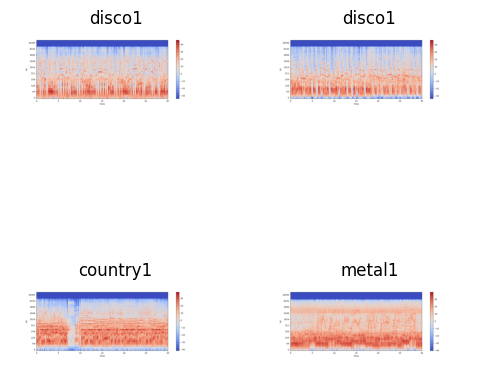

In [ ]:
data.train.show_batch()


In [ ]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


##network

In [ ]:
learn=cnn_learner(data,models.resnet18,metrics=error_rate)

In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
learn.to(device)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [ ]:
torch.backends.cuda.max_split_size_mb = 0

##--------------------------------------------------------------------

vh_mixup

In [ ]:
learn.fine_tune(25)  # train the model for 10 epochs

epoch,train_loss,valid_loss,error_rate,time
0,2.883459,1.270761,0.480000,00:11


epoch,train_loss,valid_loss,error_rate,time
0,1.641397,3.731674,0.640000,00:11
1,1.388181,20.203133,0.940000,00:11
2,1.297256,14.724870,0.800000,00:11
3,1.338488,45.394020,0.920000,00:11
4,1.268497,29.690475,0.920000,00:11
5,1.116846,24.466537,0.900000,00:11
6,1.079277,19.810070,0.920000,00:11
7,1.216525,21.738075,0.920000,00:11
8,1.142824,22.420521,0.920000,00:11
9,1.241124,44.697830,0.880000,00:11


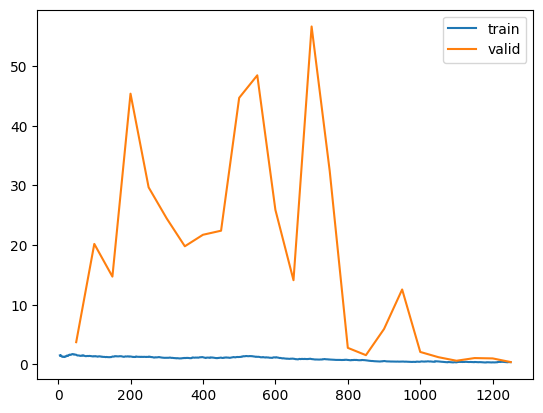

In [ ]:
# plot losses
learn.recorder.plot_loss()

In [ ]:
# learn.recorder.plot_metric()

In [ ]:
learn.save('stage1')

Path('/content/drive/My Drive/DL_project_music/Data/MELspectrograms/models/stage1.pth')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()
# learn.recorder.plot_lr()
learn.recorder.plot_losses()

In [ ]:
# Get validation accuracy
val_accuracy = learn.validate(dl=data.valid)[1]
print("Validation accuracy: ", val_accuracy)

# Get train accuracy
train_accuracy = learn.validate(dl=data.train)[1]
print("Train accuracy: ", train_accuracy)


In [ ]:
test_loss, test_accuracy = learn.validate()
print('Test Loss:', test_loss)
print('Test Accuracy:', test_accuracy)


In [ ]:
num_classes = len(data.vocab)
print(f"Number of classes: {num_classes}")


Number of classes: 10


In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

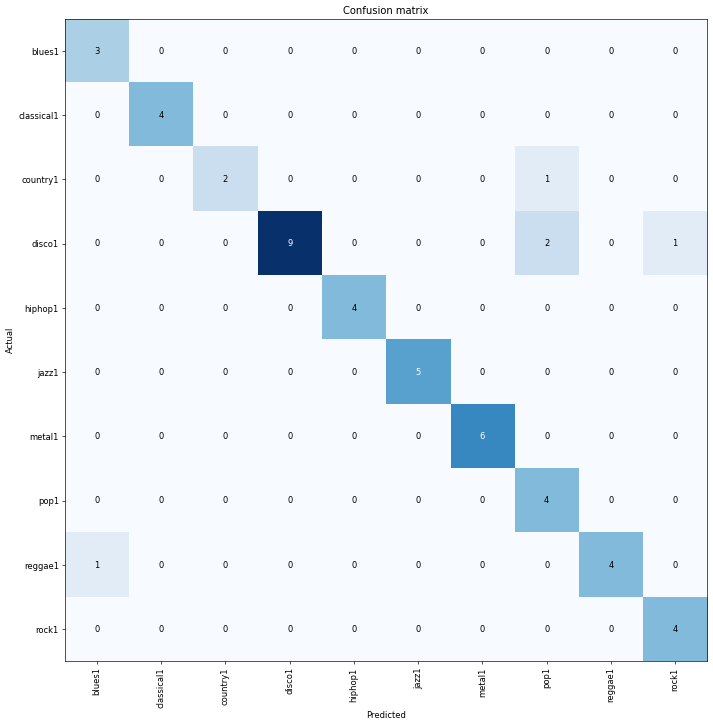

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

##--------------------------------------------

learning rate=1e-3

In [ ]:
lr=1e-03


In [ ]:
learn.fit_one_cycle(4,slice(lr))

In [ ]:
learn.recorder.plot_loss()

In [ ]:
lr=1e-04
learn.fit_one_cycle(4,slice(lr))

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
lr=1e-03
learn.fit_one_cycle(8,slice(lr))

In [ ]:
learn.save('stage2')

In [ ]:
learn.recorder.plot()

In [ ]:
lr=lr/1000
learn.fit_one_cycle(2,slice(lr))

In [ ]:
learn.save('stage3')

In [ ]:
learn.fit_one_cycle(2,slice(lr))

In [ ]:
learn.fit_one_cycle(4,slice(3.5e-07))

In [ ]:
learn.fit_one_cycle(6,slice(3.5e-10))

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

## Now testing with Resnet 50

In [ ]:
# learn1=create_cnn(data,models.resnet50,metrics=error_rate)
learn1 = cnn_learner(data, models.resnet18, metrics=error_rate)


In [ ]:
learn1.fit_one_cycle(2)

In [ ]:
lr_find(learn1)
learn1.recorder.plot()

In [ ]:
lr=2e-03
learn1.fit_one_cycle(6,slice(lr))

In [ ]:
learn1.recorder.plot()

In [ ]:
learn1.save('50-stage1')

In [ ]:
lr=0.9e-04
learn1.fit_one_cycle(7,slice(lr))

In [ ]:
learn1.recorder.plot()

In [ ]:
learn1.fit_one_cycle(6,slice(2e-05))

In [ ]:
learn1.recorder.plot()

In [ ]:
learn1.unfreeze()


In [ ]:
lr_find(learn1)
learn1.recorder.plot()

In [ ]:
lr=1e-03
learn1.fit_one_cycle(7,slice(lr))

In [ ]:
learn1.save('50-stage2')

In [ ]:
learn1.recorder.plot()

In [ ]:
lr=lr/1000
learn1.fit_one_cycle(5,slice(lr))

In [ ]:
learn1.save('50-stage2')

In [ ]:
learn1.unfreeze()
learn1.recorder.plot()

In [ ]:
learn1.fit_one_cycle(4)

In [ ]:
learn1.save('50-stage3')

In [ ]:
interp=ClassificationInterpretation.from_learner(learn1)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

I regret to inform you, if we fit more,it will overfit and regularize, so unfortunately bye bye Resnet 50, you weren't helpful at all

## Recorded Performances till now:
**Resnet34**: 79%
**Resnet50**: 75.9%

I will try AlexNet once, lets see

In [ ]:
learn2=create_cnn(data,models.alexnet,metrics=error_rate)

In [ ]:
learn2.fit_one_cycle(4)

In [ ]:
learn2.unfreeze()

In [ ]:
lr_find(learn2)
learn2.recorder.plot()

In [ ]:
lr=1e-03
learn2.fit_one_cycle(7,slice(lr))

In [ ]:
lr=lr/1000
learn2.fit_one_cycle(5,slice(lr))

In [ ]:
learn2.unfreeze()
lr_find(learn2)
learn2.recorder.plot()

In [ ]:
learn2.save('alex-stage1')

In [ ]:
learn2.fit_one_cycle(7,slice(1e-03))

In [ ]:
learn2.save('alex-stage2')

In [ ]:
learn2.unfreeze()
lr_find(learn2)
learn2.recorder.plot()


In [ ]:
learn2.fit_one_cycle(6,slice(2e-05))

In [ ]:
learn2.recorder.plot()

In [ ]:
learn2.fit_one_cycle(7,slice(3e-06))

##Using VGG16 to compare with that paper results

In [ ]:
learn3=create_cnn(data,models.vgg16_bn,metrics=error_rate)

In [ ]:
learn3.fit_one_cycle(4)

In [ ]:
learn3.unfreeze()

In [ ]:
lr_find(learn3)
learn3.recorder.plot()

In [ ]:
lr=3e-03
learn3.unfreeze()
learn3.fit_one_cycle(7,slice(lr))

In [ ]:
learn3.unfreeze()
lr_find(learn3)
learn3.recorder.plot()

In [ ]:
learn3.save('vgg16-1')

In [ ]:
lr=1e-03
learn3.unfreeze()
learn3.fit_one_cycle(5,slice(lr))

In [ ]:
learn3.save('vgg16-2')

In [ ]:
learn3.recorder.plot()

In [ ]:
learn3.unfreeze()
lr_find(learn3)
learn3.recorder.plot()

In [ ]:
learn3.unfreeze()
learn3.fit_one_cycle(4,slice(1e-05))

In [ ]:
interp=ClassificationInterpretation.from_learner(learn3)
losses,idxs=interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

**Since it starts to overfit, we draw the line at VGG Stage 2**